# Implementation

## Training curve for amount of data

[ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400] [1.         1.         0.99933333 0.9995     0.9992     0.99933333
 0.99971429 0.9995     0.99911111 0.9992     0.99872727 0.99866667
 0.99876923 0.99885714] [0.87722222 0.945      0.96722222 0.97166667 0.98       0.985
 0.98833333 0.99055556 0.99055556 0.99       0.99055556 0.99222222
 0.99333333 0.99277778] [0.         0.         0.00133333 0.001      0.0009798  0.0008165
 0.00057143 0.00061237 0.00083148 0.00074833 0.00092709 0.00040825
 0.00037684 0.00034993] [0.03961232 0.01715938 0.00984447 0.00408248 0.00666667 0.00777778
 0.00593171 0.00515201 0.0041574  0.00515201 0.0041574  0.00323942
 0.0041574  0.00376796]


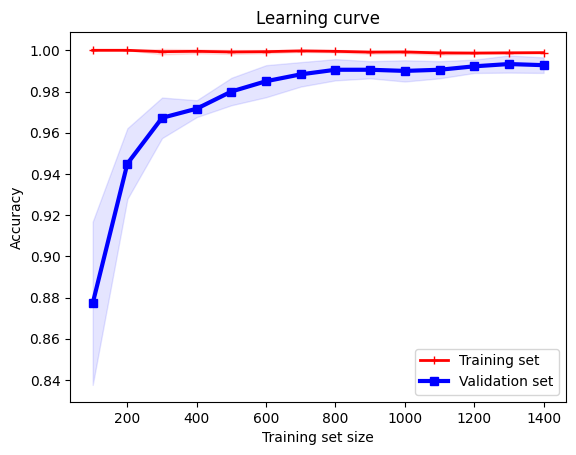

In [3]:
from typing import Callable, Tuple

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


def generate_data() -> Tuple[np.ndarray, np.ndarray]:
    """Generate synthetic data for binary classification."""
    X, y = load_digits(return_X_y=True)
    return X, y


def learning_curve(
    estimator: Callable,
    scorer: Callable,
    X: np.ndarray,
    y: np.ndarray,
    start: int = 100,
    step: int = 100,
    n_runs: int = 5,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Compute the learning curve for a Support Vector Classifier model."""
    train_scores_runs = []
    val_scores_runs = []

    for _ in range(n_runs):
        seed = np.random.randint(0, 1000)
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )

        train_sizes = np.arange(start, len(X_train) + 1, step)

        train_scores = []
        val_scores = []

        for m in range(start, len(X_train) + 1, step):
            estimator.fit(X_train[:m], y_train[:m])

            train_score = scorer(y_train[:m], estimator.predict(X_train[:m]))
            val_score = scorer(y_val, estimator.predict(X_val))

            train_scores.append(train_score)
            val_scores.append(val_score)

        train_scores_runs.append(train_scores)
        val_scores_runs.append(val_scores)

    train_mean = np.mean(train_scores_runs, axis=0)  # mean of acc column
    val_mean = np.mean(val_scores_runs, axis=0)  # mean of acc column
    train_std = np.std(train_scores_runs, axis=0)
    val_std = np.std(val_scores_runs, axis=0)

    return train_sizes, train_mean, val_mean, train_std, val_std


def plot_learning_curve(
    train_sizes: np.ndarray,
    train_mean: np.ndarray,
    val_mean: np.ndarray,
    train_std: np.ndarray,
    val_std: np.ndarray,
    start: int = 100,
    step: int = 100,
) -> None:
    """Plot the learning curve with standard deviation fill."""
    x_values = np.arange(start, len(train_mean) * step + start, step)
    np.testing.assert_array_equal(x_values, train_sizes)

    plt.plot(x_values, train_mean, "r-+", linewidth=2, label="Training set")
    plt.fill_between(
        x_values,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.1,
        color="r",
    )

    plt.plot(x_values, val_mean, "b-s", linewidth=3, label="Validation set")
    plt.fill_between(
        x_values,
        val_mean - val_std,
        val_mean + val_std,
        alpha=0.1,
        color="b",
    )

    plt.xlabel("Training set size")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.title("Learning curve")
    plt.show()


# Generate synthetic data
X, y = generate_data()

# Initialize the model
model = SVC(kernel="rbf", gamma=0.001)
scorer = accuracy_score

# Compute learning curve
train_sizes, train_mean, val_mean, train_std, val_std = learning_curve(
    model, accuracy_score, X, y, start=100, step=100, n_runs=5
)
print(train_sizes, train_mean, val_mean, train_std, val_std)

# Plot learning curve with standard deviation fill
plot_learning_curve(train_sizes, train_mean, val_mean, train_std, val_std)


(1797, 64)

What this algorithm above is doing is the following:

- We intend to use different seeds for more robust results. So we will run the experiment multiple times.
- In each experiment, we will split the data into a training set and a validation set.
- Then we define a `start` and `step` to indicate how many data points we want to use for training in the first iteration, and how many data points we want to add in each iteration.
    - For example, if `start` is $100$ and `step` is $100$, then we will use $100$ data points for training in the first iteration, and $200$ data points for training in the second iteration, and so on.
- Assume we have $1000$ data points in total. 
    - Training set: $900$ data points
    - Validation set: $100$ data points
- Assume `start` is $100$ and `step` is $100$.
    - Iteration 1: $100$ data points for training, producing hypothesis $h_1$, and use $h_1$ to evaluate the loss function on the training set and the validation set. Note that the validation set is the same for all iterations, to be $100$ data points.
    - Iteration 2: $200$ data points for training, producing hypothesis $h_2$, and use $h_2$ to evaluate the loss function on the training set and the validation set. Note that the validation set is the same for all iterations, to be $100$ data points.
    - Iteration 3: $300$ data points for training, producing hypothesis $h_3$, and use $h_3$ to evaluate the loss function on the training set and the validation set. Note that the validation set is the same for all iterations, to be $100$ data points.
    - ...
    - Iteration 9: $900$ data points for training, producing hypothesis $h_9$, and use $h_9$ to evaluate the loss function on the training set and the validation set. Note that the validation set is the same for all iterations, to be $100$ data points.
- So we now have $9$ hypotheses, $h_1, h_2, \ldots, h_9$, and $9$ training losses, `train_loss_1`, `train_loss_2`, ..., `train_loss_9`, and $9$ validation losses, `val_loss_1`, `val_loss_2`, ..., `val_loss_9`. We can now plot the training loss and the validation loss as a function of the number of training examples.
- An additional layer of complexity is that we want to run the experiment multiple times, say $3$ times, and we want to plot the average training loss and the average validation loss as a function of the number of training examples.
- Everything is the same, just that we compile the training loss and the validation loss for each iteration for each experiment, and then we average them. Represented as a matrix below, we see:

    $$
    \text{train_loss} = \begin{bmatrix}
    \text{train_loss_11} & \text{train_loss_12} & \cdots & \text{train_loss_19} \\
    \text{train_loss_21} & \text{train_loss_22} & \cdots & \text{train_loss_29} \\
    \text{train_loss_31} & \text{train_loss_32} & \cdots & \text{train_loss_39} \\
    \end{bmatrix}
    $$

    $$
    \text{val_loss} = \begin{bmatrix}
    \text{val_loss_11} & \text{val_loss_12} & \cdots & \text{val_loss_19} \\
    \text{val_loss_21} & \text{val_loss_22} & \cdots & \text{val_loss_29} \\
    \text{val_loss_31} & \text{val_loss_32} & \cdots & \text{val_loss_39} \\
    \end{bmatrix}
    $$

    where the matrix has $3$ rows and $9$ columns, each row representing the training loss and the validation loss for one experiment.

    So we sum each column, and divide by $3$ to get the average training loss and the average validation loss across the $3$ experiments.


## Training curve for number of iterations

This is quite simple, we just need to plot the training loss and validation loss as a function of the number of iterations,
especially in gradient based optimization algorithms (i.e. neural networks).